Using TensorFlow backend.


('n02123045', ['tabby', 'tabby cat'])


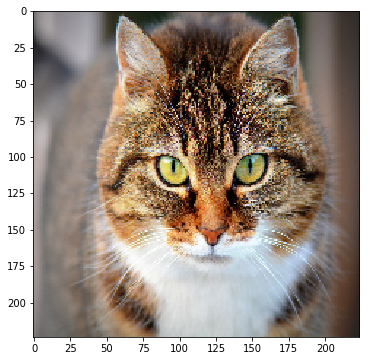

In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import numpy as np

def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model
    
# OpenCV image to Matplotlib
# rgb = bgr[...,::-1]

# Matplotlib image to OpenCV
# bgr = rgb[...,::-1]

def loadimg_cv2(fname):
    """Load image in OpenCV format (BGR) using OpenCV"""
    import cv2
    im = cv2.resize(cv2.imread(fname), (224, 224))
    fig = plt.figure("Figure", figsize=(12,6))
    plt.imshow(im[...,::-1])
    return im.astype(np.float32)

def loadimg_skimage(fname):
    """Load image in OpenCV format (BGR) using skimage"""
    import skimage.io, skimage.transform
    im = skimage.transform.resize(skimage.io.imread('cat.jpg'), (224, 224))
    fig = plt.figure("Figure", figsize=(12,6))
    plt.imshow(im)
    return im[...,::-1]*255

def predict(fname):
    im = loadimg_skimage(fname)
    im[:,:] -= np.array([103.939, 116.779, 123.68])
    im = im.transpose((2,0,1))
    im = np.expand_dims(im, axis=0)
    # Test pretrained model
    model = VGG_16('vgg16_weights.h5')
    
    sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='categorical_crossentropy')
    out = model.predict(im)
    return np.argmax(out)
    
if __name__ == "__main__":
    from synset import get_label
    print(get_label(predict('cat.jpg')))